In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
from dateutil.parser import parse

In [81]:
# This function plots the grid of distributions
# Options of columns: WorkTimeInSeconds, ResponseTime, TotalTime

def plot_dist(col='WorkTimeInSeconds'):
    figure = plt.figure(figsize=(10, 10))
    counter = 1
    for lang in lang_list:
        df = df_dict["df_exp1_{}".format(lang)]
        figure.add_subplot(3, 2, counter)
        plt.hist(df[col])
        counter = counter + 1

In [13]:
# This function prints basic stats of a column

def print_stats(col='ResponseTime'):
    for lang in lang_list:
        print ("==============")
        print ("The stats of {}".format(lang))
        df = df_dict["df_exp1_{}".format(lang)]
        print ("Number of samples: ", len(df[col]))
        print ("Mean: ", df[col].mean())
        print ("STD: ", df[col].std())
        print ("Max: ", df[col].max())
        print ("Min: ", df[col].min())

In [4]:
# Based on the histogram, working time on translations is inline with Exponential / Pareto Distribution
# This function synthesize distributions(i.e. Pareto, Gaussian)

def synthesize(dist="Gaussian", sample_size=1000, parameters={}):
    if dist == "Gaussian":
        sample = np.random.normal(paramters['mean'], parameters['std'], sample_size)
    elif dist == "Pareto":
        sample = (np.random.pareto(parameters['shape'], sample_size) + 1) * parameters['scale']
    return sample

In [41]:
# This function fits the sample to distribution and returns parameters

def fit_dist(samples, dist="Pareto"):
    parameters = {}
    if (dist == "Gaussian"):
        parameters['mean'] = samples.mean()
        parameters['std'] = samples.std()
    if (dist == "Pareto"):
        parameters['scale'] = samples.min()
        scale_array = np.full(shape=len(samples), fill_value=samples.min())
        parameters['shape'] = len(samples)/(sum(np.log(samples/scale_array)))
    return parameters

In [ ]:
df_en_3 = pd.read_csv("../../data/EXP2_data/CSV/en-gb-3cents.csv")

In [ ]:
df_en_3.shape

In [ ]:
df_en_3.head(100)

In [ ]:
df_en_3.columns

In [44]:
lang_list = ['EN_GB', 'AR_SA', 'DE_DE', 'ES_MX', 'FR_FR']
df_dict = dict()
for lang in lang_list:
    df_dict["df_exp1_{}".format(lang)] = pd.read_excel("../../data/EXP1_data/EXP2_{}.xlsx".format(lang))


In [9]:
# Mean and STD of time
work_time_secs = df_exp1_en.WorkTimeInSeconds


In [22]:
(parse(df_exp1_en.AcceptTime[0]) - parse(df_exp1_en.CreationTime[0])).total_seconds()

146.0

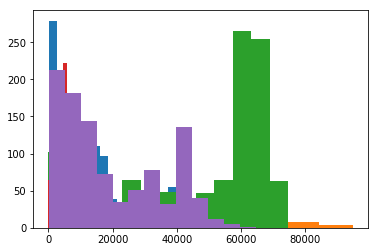

In [50]:
for lang in lang_list:
    df = df_dict["df_exp1_{}".format(lang)]
    df['ResponseTime'] = df.apply(lambda row: (parse(row['AcceptTime']) - parse(row['CreationTime'])).total_seconds(), axis=1)
    #_ = plt.hist(df['ResponseTime'], bins='auto')

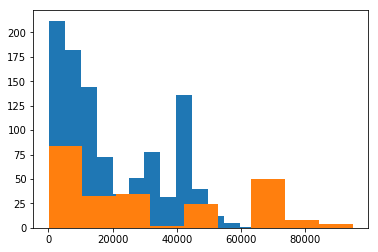

In [53]:
_ = plt.hist(df_dict['df_exp1_FR_FR']['ResponseTime'], bins='auto')
_ = plt.hist(df_dict['df_exp1_AR_SA']['ResponseTime'], bins='auto')


In [58]:
print (df_dict['df_exp1_AR_SA']['ResponseTime'].max())
print (df_dict['df_exp1_EN_GB']['ResponseTime'].max())
print (df_dict['df_exp1_DE_DE']['ResponseTime'].max())
print (df_dict['df_exp1_ES_MX']['ResponseTime'].max())
print (df_dict['df_exp1_FR_FR']['ResponseTime'].max())

94808.0
42494.0
74662.0
18591.0
64644.0


In [59]:
print (df_dict['df_exp1_AR_SA']['ResponseTime'].mean())
print (df_dict['df_exp1_EN_GB']['ResponseTime'].mean())
print (df_dict['df_exp1_DE_DE']['ResponseTime'].mean())
print (df_dict['df_exp1_ES_MX']['ResponseTime'].mean())
print (df_dict['df_exp1_FR_FR']['ResponseTime'].mean())

30801.170833333334
11451.319
49055.197
6647.059
19400.056


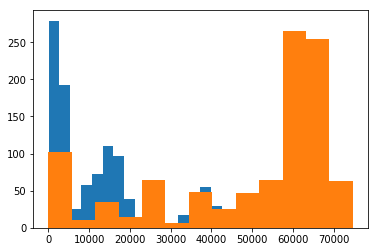

In [55]:
_ = plt.hist(df_dict['df_exp1_EN_GB']['ResponseTime'], bins='auto')
_ = plt.hist(df_dict['df_exp1_DE_DE']['ResponseTime'], bins='auto')

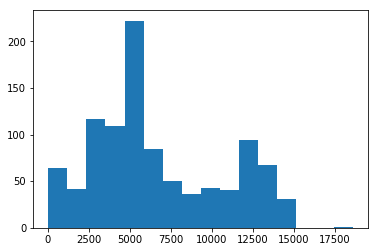

In [56]:
_ = plt.hist(df_dict['df_exp1_ES_MX']['ResponseTime'], bins='auto')

In [60]:
print (df_dict['df_exp1_AR_SA']['WorkTimeInSeconds'].max())
print (df_dict['df_exp1_EN_GB']['WorkTimeInSeconds'].max())
print (df_dict['df_exp1_DE_DE']['WorkTimeInSeconds'].max())
print (df_dict['df_exp1_ES_MX']['WorkTimeInSeconds'].max())
print (df_dict['df_exp1_FR_FR']['WorkTimeInSeconds'].max())

941
2935
2991
3574
1598


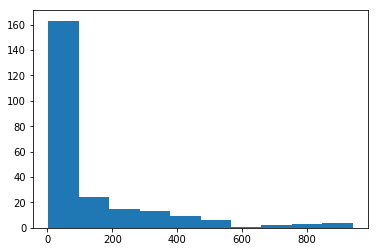

In [62]:
_ = plt.hist(df_dict['df_exp1_AR_SA']['WorkTimeInSeconds'])

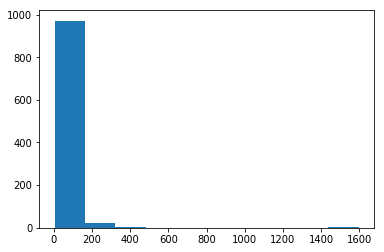

In [63]:
_ = plt.hist(df_dict['df_exp1_FR_FR']['WorkTimeInSeconds'])

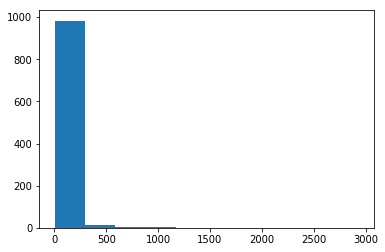

In [64]:
_ = plt.hist(df_dict['df_exp1_EN_GB']['WorkTimeInSeconds'])

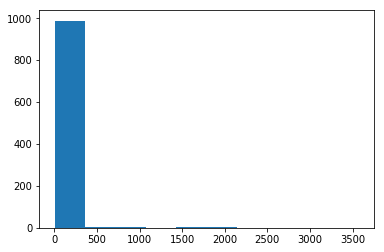

In [65]:
_ = plt.hist(df_dict['df_exp1_ES_MX']['WorkTimeInSeconds'])

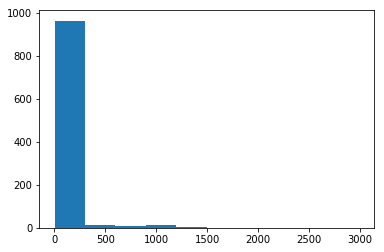

In [66]:
_ = plt.hist(df_dict['df_exp1_DE_DE']['WorkTimeInSeconds'])

In [67]:
for lang in lang_list:
    df = df_dict["df_exp1_{}".format(lang)]
    df['TotalTime'] = df.apply(lambda row: row['WorkTimeInSeconds'] + row['ResponseTime'], axis=1)
    

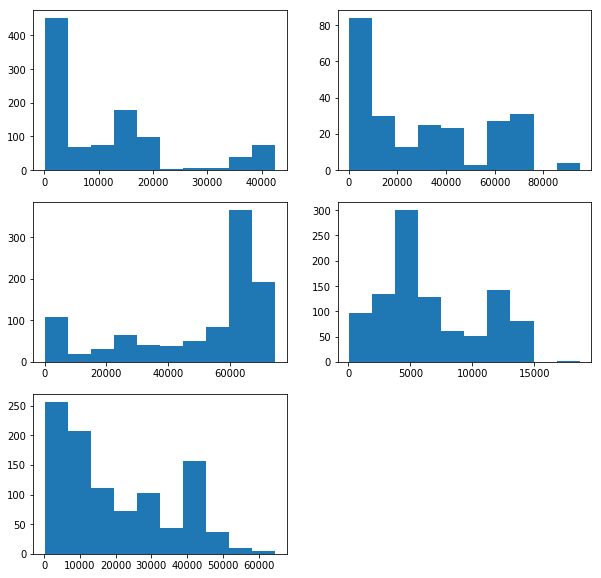

In [84]:
plot_dist('TotalTime')

In [8]:
print ("mean: ", work_time_secs.mean())
print ("STD: ", work_time_secs.std())
print ("Max: ", work_time_secs.max())
print ("Min: ", work_time_secs.min())


mean:  37.837
STD:  117.28881915211741
Max:  2935
Min:  3


In [39]:
print (fit_dist(samples, "Pareto"))

{'scale': 10.202026379662264, 'shape': 0.8252888540311597}


In [25]:
samples.min()

10.202026379662264

In [8]:
samples = synthesize("Pareto", 100, {"shape":1, "scale":10})

In [ ]:
normal_samples = synthesize("Gaussian", 100, {"mean"})

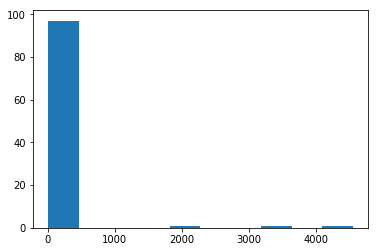

In [12]:
_ = plt.hist(samples)

In [100]:
print_stats()

The stats of EN_GB
Number of samples:  1000
Mean:  11451.319
STD:  11600.641392524683
Max:  42494.0
Min:  74.0
The stats of AR_SA
Number of samples:  240
Mean:  30801.170833333334
STD:  27153.261545080506
Max:  94808.0
Min:  64.0
The stats of DE_DE
Number of samples:  1000
Mean:  49055.197
STD:  22523.27355007712
Max:  74662.0
Min:  34.0
The stats of ES_MX
Number of samples:  1000
Mean:  6647.059
STD:  3918.862317482254
Max:  18591.0
Min:  46.0
The stats of FR_FR
Number of samples:  1000
Mean:  19400.056
STD:  15525.20325364313
Max:  64644.0
Min:  149.0
